<a href="https://colab.research.google.com/github/thealgohype/agentic-rag-lc/blob/main/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reflection Agent :

#### Install Dependencies :

In [1]:
!pip install -q -U langgraph langchain langchain_core langchain_openai langchain_groq langchain_community langsmith black isort

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.5/362.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/

In [2]:
!pip install -U -q chromadb langchain-chroma langchain-experimental unstructured pdfminer langchain-fireworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s 

In [3]:
#@title Setup Langsmith

import os
from google.colab import userdata
lc_key= userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "graph"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = lc_key


In [4]:
#@title Setup the Chains
from google.colab import userdata
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

reflection_prompt = ChatPromptTemplate.from_messages(
    [
      (
          "system",
          "You are a viral twitter influencer grading a tweet, . Generate critique and recommendations for the user"
          "Always provide detailed recommendations, including requests for the length, virality, style, etc."

      ),
      MessagesPlaceholder(variable_name="messages"),
     ]
)


generation_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a twitter techie influencer assistant tasked with writing excellent twitter posts."
            " Generate the best twitter post possible for the user's request."
            "If the user wants critique, respond with a revised version of your previous attempts.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)


llm = ChatOpenAI(api_key = userdata.get('openai_key'), model= "gpt-4o-mini")
generate_chain = generation_prompt | llm
reflect_chain = reflection_prompt | llm


In [ ]:
#@title Implementing the Lang-Graph Graph :

# In order to build the graph, we need to breakdown our workflow orchestration to a graph format.

from typing import List, Sequence

from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

REFLECT = "reflect"
GENERATE = "generate"

def generate_node(state: Sequence[BaseMessage]):
  return generate_chain.invoke({"messages": state})

def reflection_node(messages: Sequence[BaseMessage])-> List[BaseMessage]:
  res = reflect_chain.invoke({"messages": messages})
  return [HumanMessage(content=res.content)]


In [ ]:
#@title Building Graph:

builder = MessageGraph()
builder.add_node(GENERATE, generate_node)
builder.add_node(REFLECT, reflection_node)
builder.set_entry_point(GENERATE)

# defining the conditional branch :
def should_continue(state: List[BaseMessage]):
  if len(state) > 6:
    return END
  return REFLECT

builder.add_conditional_edges(GENERATE, should_continue)
builder.add_edge(REFLECT, GENERATE)

graph = builder.compile()

In [ ]:
#@title Get the Graph Diagram (Mermaid Code):
print(graph.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([__start__]):::first
	generate(generate)
	reflect(reflect)
	__end__([__end__]):::last
	__start__ --> generate;
	reflect --> generate;
	generate -.-> reflect;
	generate -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



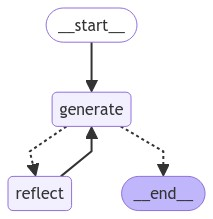

In [ ]:
#@title Get the Graph Diagram Directly
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
#@title Test the Graph :
'''
inputs = HumanMessage(content = """Make this tweet Better :"
@LangChainAI
- newly Tool Calling feature is seriosly underrated

After a long wait, it's here. Makiint he implementation of different AI agents as easy as pie.

Made a video covering their latest blog post.


"""

)

response = graph.invoke(inputs)

'''

'\ninputs = HumanMessage(content = """Make this tweet Better :"\n@LangChainAI\n- newly Tool Calling feature is seriosly underrated\n\nAfter a long wait, it\'s here. Makiint he implementation of different AI agents as easy as pie.\n\nMade a video covering their latest blog post.\n\n\n"""\n\n)\n\nresponse = graph.invoke(inputs)\n\n'

In [ ]:

import textwrap
from IPython.display import display, Pretty

def wrap_print(text, width=120):
    wrapped_text = textwrap.fill(str(text), width=width)
    display(Pretty(wrapped_text))

# Example usage:
long_text = "This is a very long string that we want to wrap so it doesn't extend beyond the width of the notebook cell. It will be wrapped to make it more readable."

wrap_print(long_text)



This is a very long string that we want to wrap so it doesn't extend beyond the width of the notebook cell. It will be
wrapped to make it more readable.

---

### ADVANCED RAG Agent :

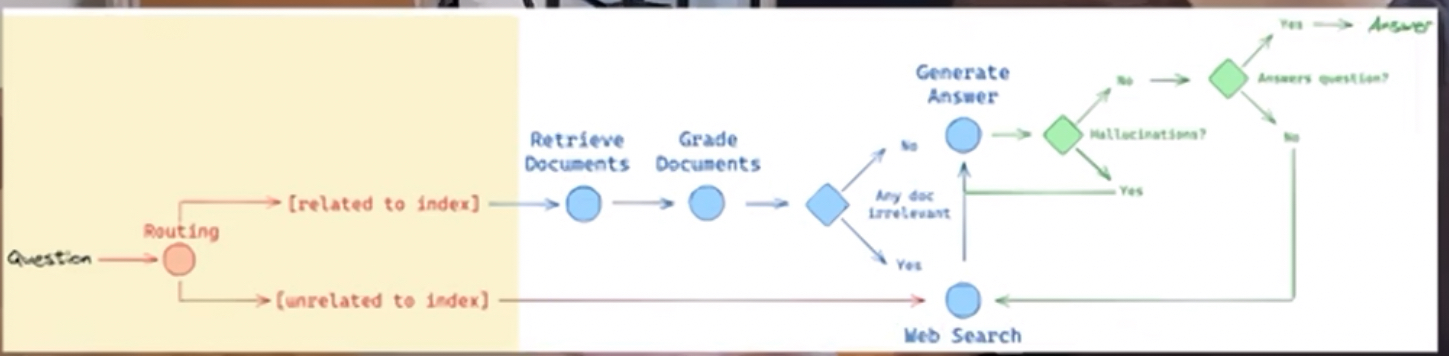

In [5]:
from IPython.display import Image

Image(filename = '/content/drive/Shareddrives/PromptSmith Labs /BuildIt/Colab Notebooks/Agents/flow.jpeg')

In [6]:
#@title Environmention Variables:

from google.colab import userdata
openai_key = userdata.get('openai_key')
tavily_key = userdata.get('TAVILY_key')
fireworks_key = userdata.get('FIREWORKS_KEY')



In [7]:
#@title Setup the Graph : function defitions

RETRIEVE = "retrieve"
GRADE_DOCUMENTS = "grade_documents"
WEB_SEARCH = "web_search"
GENERATE = "generate"


In [9]:
#@title Split and Embed the documents in the retreiver
from langchain_chroma import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader, TextLoader
from langchain_openai import OpenAIEmbeddings, ChatOpenAI

# URLs for LangChain API reference
urls = [
    "https://api.python.langchain.com/en/latest/langchain_api_reference.html",
    "https://api.python.langchain.com/en/latest/core_api_reference.html",
    "https://api.python.langchain.com/en/latest/community_api_reference.html",
    "https://api.python.langchain.com/en/latest/experimental_api_reference.html",
    "https://api.python.langchain.com/en/latest/chroma_api_reference.html",
    "https://api.python.langchain.com/en/latest/anthropic_api_reference.html",
    "https://api.python.langchain.com/en/latest/fireworks_api_reference.html",
    "https://api.python.langchain.com/en/latest/openai_api_reference.html",
]

# Load web documents
web_docs = [WebBaseLoader(url).load() for url in urls]
web_docs_list = [item for sublist in web_docs for item in sublist]

# Load the book
book_loader = TextLoader("/content/generative-ai-langchain-language-chatgpt.txt")
book_docs = book_loader.load()

# Combine all documents
all_docs = web_docs_list + book_docs

# Split the combined documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=20)
doc_splits = text_splitter.split_documents(all_docs)

# Create and populate the vectorstore
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma-combo",
    embedding=OpenAIEmbeddings(api_key=openai_key),
    persist_directory="/content/persistor-combo"
)

# Create a retriever from the vectorstore
retriever = vectorstore.as_retriever()


print(f"Total documents in vectorstore: {vectorstore._collection.count()}")

Total documents in vectorstore: 1800


In [10]:
#@title RAG retireval Chain :
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(api_key=openai_key, model="gpt-4o-mini", temperature= 0.1)  # Corrected model name

rag_prompt = ChatPromptTemplate.from_template("""
You are an AI Assistant who is an expert on Langchain and explaining and Assisting with user
queries in making AI apps and Langchain. If you do not know the answer, say you don't know. You will answer each query based on the context provided.

Question:
{question}

Context:
{context}

Answer:
""")

chunko = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    RunnableParallel(
        {"context": chunko , "question": RunnablePassthrough()}
    )
    | rag_prompt
    | llm
    | StrOutputParser()
)

ques = input("Enter your question: ")
result = rag_chain.invoke(ques)
print("Answer:", result)

Enter your question: ashutosh
Answer: I'm sorry, but I don't have any information related to "ashutosh" in the provided context. If you have a specific question or need assistance with Langchain or AI apps, feel free to ask!


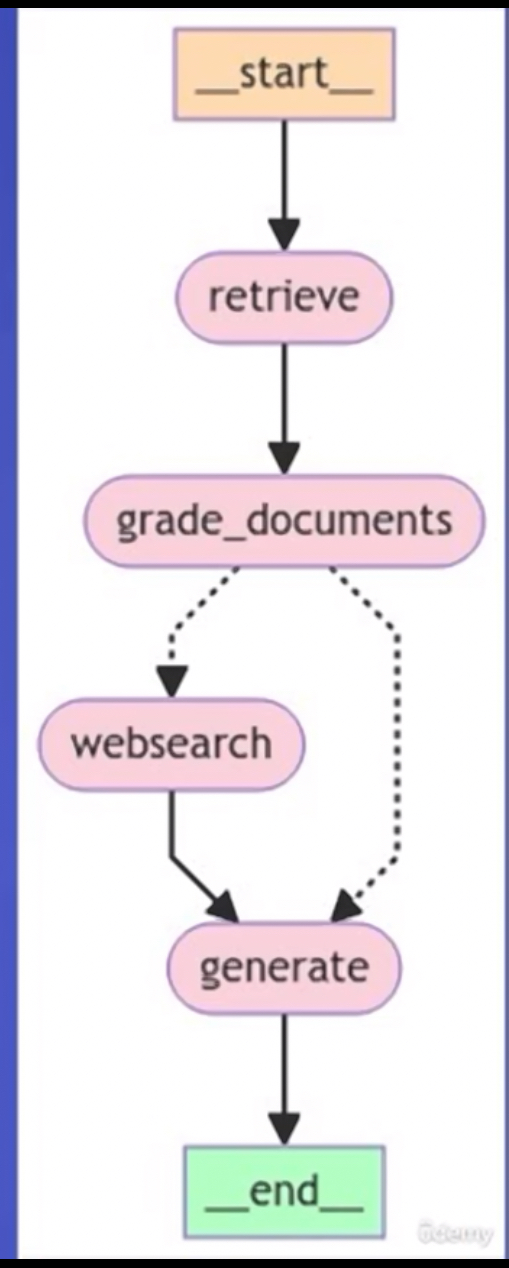

In [11]:
from IPython.display import Image, display

# Assuming 'path_to_your_image' is the correct path to your image
Image(filename='/content/drive/Shareddrives/PromptSmith Labs /BuildIt/Colab Notebooks/Agents/IMG_C6DC8656ABE7-1.jpeg', width=200, height=500)

In [ ]:
from langchain_fireworks import Fireworks

llm_os = Fireworks(api_key=fireworks_key, model="accounts/fireworks/models/llama-v3p1-405b-instruct", max_tokens= "4000")

In [12]:
#@title State Definition :
from typing import List, TypedDict, Annotated

class GraphState(TypedDict):
  """
  Represents the state of our graph.

  Attributes :

  question : question
  generation : LLM Generation
  web_search : whether to add search
  documents : list of documents
  """
  question : str
  generation : str
  web_search : bool
  documents : List[str]


In [13]:
#@title Retrieve Node :
from typing import List, Dict, Any, TypedDict
from langgraph.graph import MessageGraph, StateGraph

def retrieve(state: GraphState) -> Dict[str, Any]:
  print("===RETRIEVE===")
  question = state["question"]

  documents = retriever.invoke(question)
  return {"documents": documents, "question": question}

In [14]:
#@title Grade Documents Chain :

from typing import TypedDict, List, Any, Dict
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI

llm2 = ChatOpenAI(temperature = 0, api_key= openai_key, model= "gpt-4o-mini")

class GradeDocument(BaseModel):
  """ Binary score for relevance check on the retreived documents. """
  binary_score:str = Field(
      description= "Documents are relevant to the question, 'yes' or 'no' "
      )

# the .with_structured_output method here will force the llm2 to give function calling responses in the pydantic schema given to the model
structured_llm_grader = llm2.with_structured_output(GradeDocument)


system = """ You are a grader assessing relevance of a retreived document to a user question.
If the ddocumentt contains keyword(s) or semantic meaning related to the question, grade it as relevant.
Give a binary score, 'yes' or 'no' score to indicate wheter the document is relevant tot he question or not. """

grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: {document}\n Question: {question}"),
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader

def grade_documents(state: GraphState) -> Dict[str,Any]:
  """
  Determines whether the retrieved documents are relevant to the question.
  If any document is not relevant, we will set a flag to run web search

  Args :
  state (dict): The current Graph State

  Returns :
  state (dict): Filtered out irrelevant documents and updated web_search state
  """
  print("===CHECK DOCUMENTS RELEVANCE TO QUESTION===")
  question = state["question"]
  documents = state.get("documents", [])  # This is the correct syntax

  filtered_docs = []
  web_search = False
  for d in documents:
    try:
      score = retrieval_grader.invoke({"document": d.page_content, "question": question})
      grade = score.binary_score
      if grade.lower() == "yes":
        print("===Grade : Document IS Relevant===")
        filtered_docs.append(d)
      else:
        print("===Grade : Document IS NOT Relevant===")
        web_search = True
    except AttributeError:
      print(f"Warning: Document doesn't have 'page_content' attribute. Document: {d}")
      web_search = True

  return {"documents": filtered_docs, "question": question, "web_search": web_search}

In [15]:
#@title Web Search Node:
from typing import Any, Dict
from langchain.schema import Document
from langchain_community.tools import BraveSearch

brave_key = userdata.get('brave_key')
web_search_tool = BraveSearch.from_api_key(api_key=brave_key, search_kwargs={"count": 3})

#from langchain_community.tools import TavilySearchResults
#web_search_tool = TavilySearchResults(TavilySearchAPIWrapper = tavily_key ,max_results =3)

def web_search_node(state: GraphState) -> Dict[str, Any]:
    print("===WEB SEARCH===")
    question = state["question"]
    documents = state["documents"]
    web_search = state["web_search"]

    try:
        tavily_results = web_search_tool.invoke(question)

        # Check if tavily_results is a string (which would be unexpected)
        if isinstance(tavily_results, str):
            print(f"Unexpected result format from web search: {tavily_results}")
            web_results = Document(page_content=tavily_results)
        else:
            # Assume tavily_results is a list of dictionaries
            joined_tavily_result = "\n".join(
                result.get("content", result.get("snippet", str(result)))
                for result in tavily_results
                if isinstance(result, dict)
            )
            web_results = Document(page_content=joined_tavily_result)

        if documents is not None:
            documents.append(web_results)
        else:
            documents = [web_results]

        return {"documents": documents, "question": question}
    except Exception as e:
        print(f"Error in web search: {str(e)}")
        return {"documents": documents, "question": question, "error": str(e)}

In [16]:
#@title Generate Chain :

from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

llm= ChatOpenAI (api_key= openai_key, model = 'gpt-4o-mini', temperature = 0.1)
prompt = hub.pull("rlm/rag-prompt")

generation_chain = prompt| llm | StrOutputParser()

def generate (state: GraphState) -> Dict[str, Any]:
  print("===GENERATE===")
  question = state["question"]
  documents = state["documents"]

  generation = generation_chain.invoke({"context": documents, "question": question})
  return {"documents": documents, "question": question, "generation": generation}

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


In [17]:
#@title Conditional Edge Function
def decide_to_generate(state):
  print("===ASSESS GRADED DOCUMENTS===")
  web_search = state.get("web_search", False)
  if web_search:
    print("===DECISION : PERFORM WEB SEARCH===")
    return WEB_SEARCH_NODE
  else:
    print("===DECISION : GENERATE===")
    return GENERATE

In [18]:
#@title Building Final Graph :
from langgraph.graph import START, END, StateGraph

builder = StateGraph(GraphState)

RETRIEVE = "RETRIEVE"
GRADE_DOCUMENTS = "GRADE_DOCUMENTS"
WEB_SEARCH_NODE = "WEB_SEARCH_NODE"
GENERATE = "GENERATE"

builder.add_node(RETRIEVE, retrieve)
builder.add_node(GRADE_DOCUMENTS, grade_documents)
builder.add_node(WEB_SEARCH_NODE, web_search_node)
builder.add_node(GENERATE, generate)

builder.set_entry_point(RETRIEVE)
builder.add_edge(RETRIEVE, GRADE_DOCUMENTS)
builder.add_conditional_edges(GRADE_DOCUMENTS, decide_to_generate, {
    WEB_SEARCH_NODE: WEB_SEARCH_NODE,
    GENERATE: GENERATE
})
builder.add_edge(WEB_SEARCH_NODE, GENERATE)
builder.add_edge(GENERATE, END)

app = builder.compile()

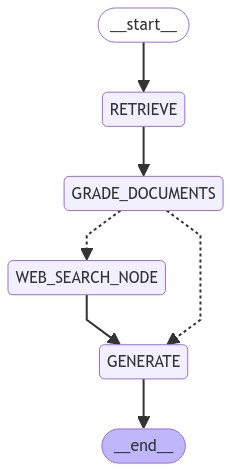

In [19]:
#@title Get the Graph Diagram Directly
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [20]:
# Define your question
question = input()

# Create the initial state
initial_state = {
    "question": question,
    "documents": [],
    "web_search": False,
    "generation": ""
}

# Run the graph
result = app.invoke(initial_state)

Tell me about the LCEL and how it works 
===RETRIEVE===
===CHECK DOCUMENTS RELEVANCE TO QUESTION===
===Grade : Document IS NOT Relevant===
===Grade : Document IS Relevant===
===Grade : Document IS NOT Relevant===
===Grade : Document IS NOT Relevant===
===ASSESS GRADED DOCUMENTS===
===DECISION : PERFORM WEB SEARCH===
===WEB SEARCH===
Unexpected result format from web search: [{"title": "Langchain LCEL explained the easy way - Use AI the right way", "link": "https://www.metadocs.co/2024/04/23/langchain-lcel-explained-the-easy-way/", "snippet": "Learn how to use Langchain Expression Language (<strong>LCEL</strong>) to create robust and production-ready chains ."}, {"title": "What is LCEL? - Flattered with Flutter - Power of LCEL for LLM Apps", "link": "https://flatteredwithflutter.com/what-is-lcel/", "snippet": "LCEL (LangChain Expression Language) is <strong>a declarative language for building and composing chains of components for working with Large Language Models (LLMs).</strong> It a